In [1]:
import numpy as np
import matplotlib.pyplot as plt
from definitions import *

/home/tbvanderwoude/repos/bep/definitions.py:47: RuntimeWarning: divide by zero encountered in log
  + 1 / 2 * valid_xi ** 2 * (1 - (valid_xi / 4 ) ** 2) * np.log(valid_xi / (2 + np.sqrt(4 - valid_xi ** 2)))
/home/tbvanderwoude/repos/bep/definitions.py:47: RuntimeWarning: invalid value encountered in multiply
  + 1 / 2 * valid_xi ** 2 * (1 - (valid_xi / 4 ) ** 2) * np.log(valid_xi / (2 + np.sqrt(4 - valid_xi ** 2)))


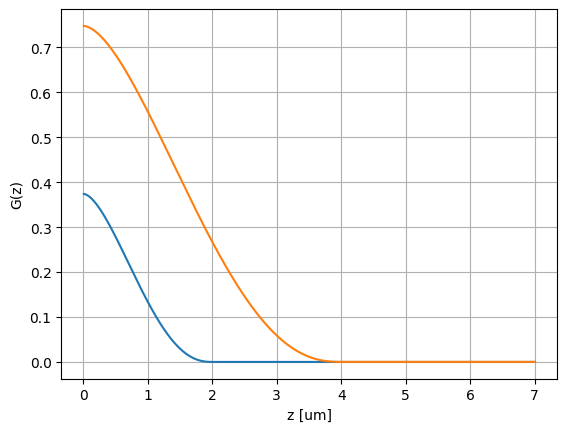

In [2]:
R = 10000e-10 # m
z = np.linspace(0,7e-6,1000)
xi = z / R
G_xi = G(z, R)
G_xi_2 = G(z, 2 * R)

plt.plot(z*1e6,G_xi)
plt.plot(z*1e6,G_xi_2)
plt.xlabel('z [um]')
plt.ylabel('G(z)')
plt.grid()

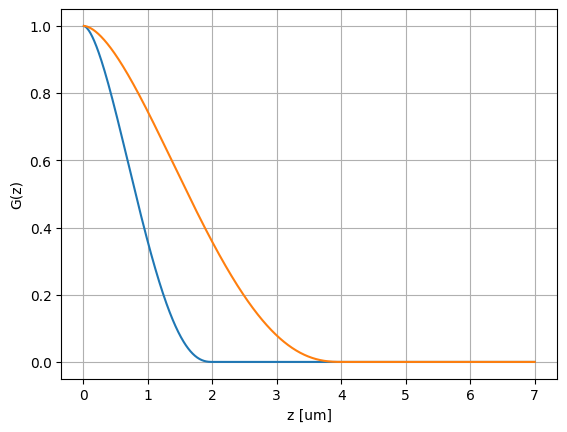

In [3]:
R = 10000e-10 # m
z = np.linspace(0,7e-6,1000)
G_xi = G_norm(z, R)
G_xi_2 = G_norm(z, 2 * R)

plt.plot(z*1e6,G_xi)
plt.plot(z*1e6,G_xi_2)
plt.xlabel('z [um]')
plt.ylabel('G(z)')
plt.grid()

In [ ]:
P = np.exp(G_xi - s_t)
plt.plot(z*1e6,P)
plt.xlabel('z [um]')
plt.ylabel('R(z)')
plt.grid()

In [ ]:
z_sim, P_sim = np.genfromtxt(f'simulation-fit.txt', delimiter=',',usecols=(0,1),unpack=True)

plt.plot(z*1e6,P, label='Analytical')
plt.plot(z_sim*1e6,P_sim,'.', label='Fitted to simulation')
plt.xlabel('z [um]')
plt.ylabel('P(z)')
plt.legend()
plt.grid()